<a href="https://colab.research.google.com/github/AD1N23/mogo/blob/main/%D0%9B%D0%A0_1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторная работа 1. Задача предсказания оттока клиентов из банка
### Выполнила Нечаева Наталья

Импорт необходимых библиотек:

In [ ]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #сплитование выборки
# plt.style.use('seaborn')


Чтение данных:

In [ ]:
data = pd.read_csv('churn.csv')
data.head()

# data.isnull().sum()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
data.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


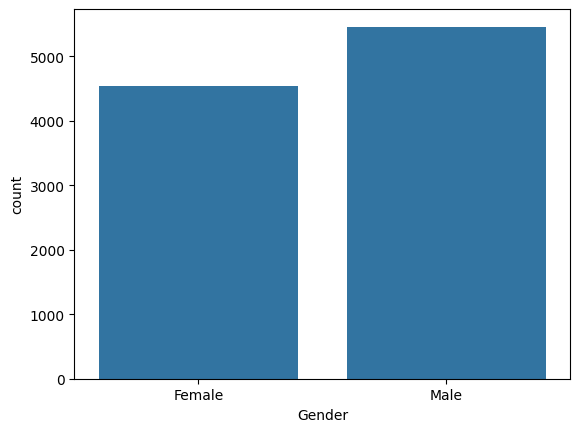

In [ ]:
sns.countplot(data=data, x='Gender');
#sns.countplot(data=data, x='Geography');

In [ ]:
types = data.dtypes
cat_features = list(types[(types == 'object')].index)
cat_features

['Surname', 'Geography', 'Gender']

In [ ]:

data.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


Выделение категориального признака и разделение на выборки:

In [ ]:
X = data.drop(['Exited'], axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 1, test_size = 0.2)

Нормализация данных:

In [ ]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

display(X_train.shape)
display(X_test.shape)

(8000, 13)

(2000, 13)

Построение модели:

In [ ]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(
    solver='sag', #алгоритм оптимизации
    random_state=1, #генератор случайных чисел
    max_iter=1000 #количество итераций на сходимость
)
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=1, solver='sag')

In [ ]:
#Делаем предсказание для тренировочной выборки
y_train_pred = log_reg.predict(X_train_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))
#Делаем предсказание для тестовой выборки
y_test_pred = log_reg.predict(X_test_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6370
           1       0.62      0.20      0.31      1630

    accuracy                           0.81      8000
   macro avg       0.72      0.59      0.60      8000
weighted avg       0.78      0.81      0.77      8000

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.61      0.19      0.29       407

    accuracy                           0.81      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



Threshold: 0.10, Positives predicted: 1399
Threshold: 0.15, Positives predicted: 1057
Threshold: 0.20, Positives predicted: 787
Threshold: 0.25, Positives predicted: 593
Threshold: 0.30, Positives predicted: 433
Threshold: 0.35, Positives predicted: 322
Threshold: 0.40, Positives predicted: 237
Threshold: 0.45, Positives predicted: 187
Threshold: 0.50, Positives predicted: 126
Threshold: 0.55, Positives predicted: 82
Threshold: 0.60, Positives predicted: 48
Threshold: 0.65, Positives predicted: 31
Threshold: 0.70, Positives predicted: 15
Threshold: 0.75, Positives predicted: 8
Threshold: 0.80, Positives predicted: 2
Threshold: 0.85, Positives predicted: 1
Threshold: 0.90, Positives predicted: 0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Threshold: 0.95, Positives predicted: 0


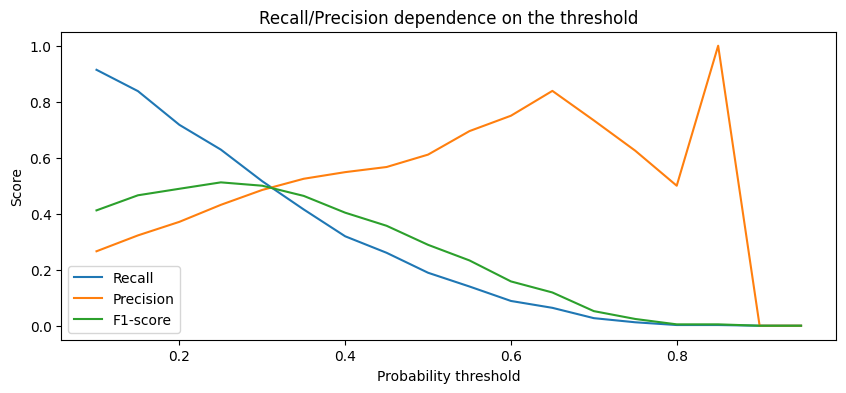

In [ ]:
y_test_proba_pred = log_reg.predict_proba(X_test_scaled)[:, 1]
y_test_proba_pred = pd.Series(y_test_proba_pred)

recall_scores = []
precision_scores = []
f1_scores = []

thresholds = np.arange(0.1, 1, 0.05)

for threshold in thresholds:
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x>threshold else 0)

    recall_scores.append(metrics.recall_score(y_test, y_test_pred))
    precision_scores.append(metrics.precision_score(y_test, y_test_pred))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))

#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
ax.plot(thresholds, recall_scores, label='Recall')
ax.plot(thresholds, precision_scores, label='Precision')


ax.plot(thresholds, f1_scores, label='F1-score')

ax.set_title('Recall/Precision dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
ax.legend();